In [35]:
import cv2 
from matplotlib import pyplot as plt 
from ultralytics import YOLO
import numpy as np
from matplotlib import pyplot as plt

cv2.__version__[0]

'4'

In [36]:
model = YOLO('C:/Users/Harini/Documents/college/MTech_Thesis-Project/django_tailwind/src/model/bestTrain13.pt')


In [37]:
def display(im_path):
    dpi = 30
    im_data = plt.imread(im_path)
    # height, width, depth = im_data.shape

    figsize = im_data.shape[1] / float(dpi), im_data.shape[0] / float(dpi)

    fig = plt.figure(figsize = figsize)
    ax = fig.add_axes([0,0,1,1])

    ax.axis('off')

    ax.imshow(im_data, cmap='gray')

    plt.show()
def disp(name,img):
    cv2.imwrite(name,img)
    display(name)

In [38]:

def detect_rec(img, show_figures=False):
    H, W, _ = img.shape
    results = model.predict(img, conf=0.5)
    # bboxes, class_ids, confidences
    bbox = None
    number = []
    print('Detections are ',results)

    bbox = results[0].boxes.xyxy.tolist()
    print('BBOX ISSSS',bbox)
    if len(bbox) == 0:
        return None
    xs, ys, xe, ye = bbox[0]
    xs, ys, xe, ye = round(xs), round(ys), round(xe), round(ye)
    bbox = (xs, ys, xe, ye)
    if False:
        img = cv2.rectangle(img,
                            (xs, ys),
                            (xe, ye),
                            (0, 255, 0),
                            4)
    # plt.figure()
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    padding = 100
    license_plate = img[ys-padding:ye+padding, xs-padding:xe+padding].copy()
    return license_plate

# Preprocess stuff


0: 640x480 (no detections), 47.6ms
Speed: 12.1ms preprocess, 47.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Detections are  [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'License'}
obb: None
orig_img: array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [17, 17, 17],
        [17, 16, 18],
        [18, 17, 19]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [16, 16, 16],
        [17, 16, 18],
        [19, 18, 20]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [16, 16, 16],
        [16, 18, 19],
        [17, 19, 20]],

       ...,

       [[43, 51, 68],
        [42, 50, 67],
        [42, 50, 67],
        ...,
        [22, 21, 23],
        [21, 20, 22],
        [21, 20, 22]],

       [[42, 50, 67],
        [42, 50, 67],
        [41, 49, 66],
     

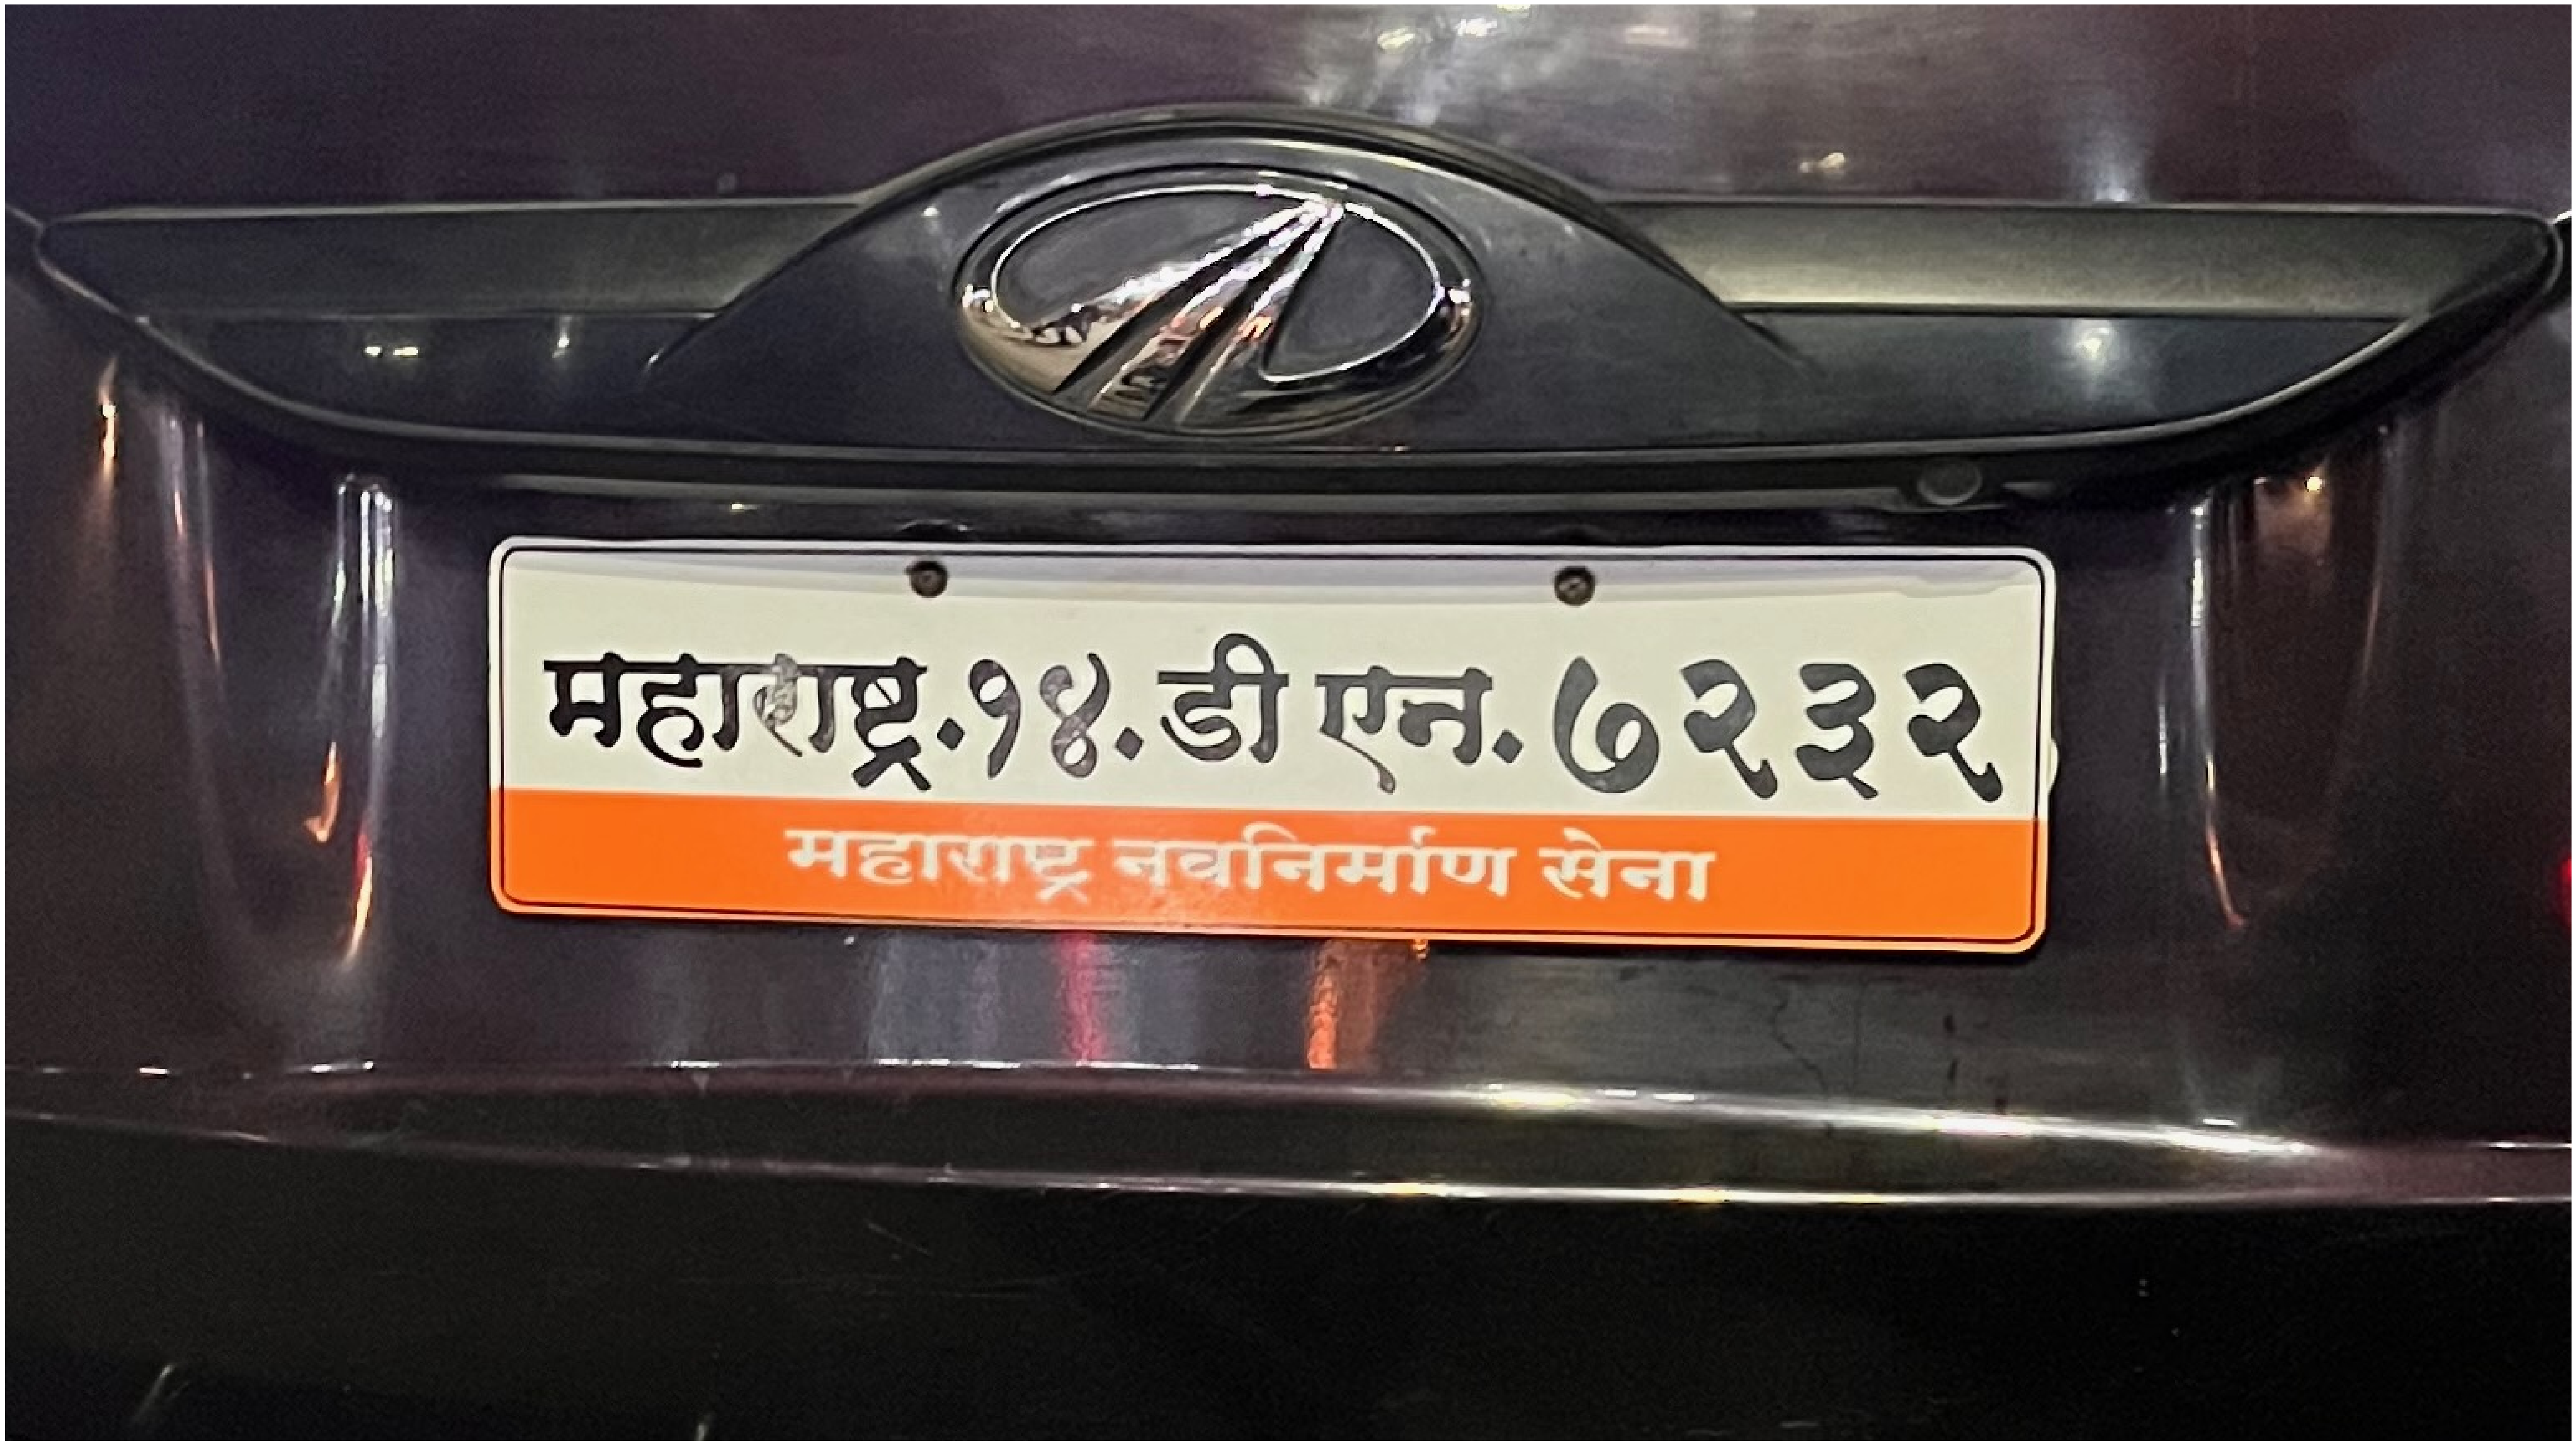

No Plate detected


In [39]:
fullImage = cv2.imread("../IMG_0819.jpeg")
img = detect_rec(fullImage)
# preprocess(img)
cv2.imwrite('img.png',img)
display('img.png')
if img is None:
    print('No Plate detected')

In [40]:
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (21,21), 0)
    cv2.imwrite('blur.png',blur)
    display('blur.png')
    thresh = cv2.threshold(blur, 64, 255, cv2.THRESH_BINARY)[1]
    cv2.imwrite('thresh.png',thresh)
    display('thresh.png')

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.imwrite('newImg.png',newImage)
    display('newImg.png')
    # plt.show(blur)
#     thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU )[1]
#     plt.show(thresh)
#     # Apply dilate to merge text into meaningful lines/paragraphs.
#     # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
#     # But use smaller kernel on Y axis to separate between different blocks of text
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
#     dilate = cv2.dilate(thresh, kernel, iterations=2)
#     plt.show(dilate)

#     # Find all contours
#     contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#     contours = sorted(contours, key = cv2.contourArea, reverse = True)
#     for c in contours:
#         rect = cv2.boundingRect(c)
#         x,y,w,h = rect
#         cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

#     # Find largest contour and surround in min area box
#     largestContour = contours[0]
#     print (len(contours))
#     minAreaRect = cv2.minAreaRect(largestContour)
#     cv2.imwrite("boxes.png", newImage)
#     # Determine the angle. Convert it to the value that was originally used to obtain skewed image
#     angle = minAreaRect[-1]
#     if angle < -45:
#         angle = 90 + angle
#     return -1.0 * angle
# # Rotate the image around its center
# def rotateImage(cvImage, angle: float):
#     newImage = cvImage.copy()
#     (h, w) = newImage.shape[:2]
#     center = (w // 2, h // 2)
#     M = cv2.getRotationMatrix2D(center, angle, 1.0)
#     newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
#     return newImage

# getSkewAngle(img)

In [41]:
# def deskew(CVimage):
#     angle = getSkewAngle(CVimage)
#     return rotateImage(CVimage, -1.0 * angle)

In [42]:
def preprocess(image):
    # red color boundaries [B, G, R]
    lower = [128,128,128]
    upper = [255,255,255]

    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    # find the colors within the specified boundaries and apply
    # the mask
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask=mask)

    
    ret,thresh = cv2.threshold(mask, 40, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if len(contours) != 0:
        # draw in blue the contours that were founded
        cv2.drawContours(output, contours, -1, 255, 3)

        # find the biggest countour (c) by the area
        c = max(contours, key = cv2.contourArea)
        x,y,w,h = cv2.boundingRect(c)

        # draw the biggest contour (c) in green
        cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),2)

    # show the images
    plt.imshow(np.hstack([image, output]))


# PRAGATI UNNA

In [43]:
def noise_removal(image):
    kernel1 = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel1, iterations=1)
    kernel2 = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel2, iterations=3)
    image = cv2.morphologyEx(image,cv2.MORPH_CLOSE, kernel2)
    image = cv2.medianBlur(image,3)
    return (image)

In [44]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
disp('gray.png',gray)
# blur = cv2.GaussianBlur(gray,(27,27),0)
thresh = cv2.threshold(gray,240,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
denoised = noise_removal(thresh)
disp('denoised.png',denoised)
cnts = cv2.findContours(denoised, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:1] #sort contours based on their area keeping minimum required area as '30' (anything smaller than this will not be considered)
NumberPlateCnt = None #we currently have no Number plate contour
print(len(cnts))
cv2.drawContours(img, cnts, -1, (255,0,0),5)
disp('contoured.png',img)
# loop over our contours to find the best possible approximate contour of number plate
count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        print('approx',approx)
        if len(approx) >= 4:  # Select the contour with 4 corners
            NumberPlateCnt = approx #This is our approx Number Plate Contour
            x,y,w,h = cv2.boundingRect(c)
            ROI = img[y:y+h, x:x+w]
            disp('roi.png',ROI)
            break

# if NumberPlateCnt is not None:
    # Drawing the selected contour on the original image
# plt.imshow(img)
# plt.show()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
import math
plate = detect_rec(img)
H,W,_ = plate.shape
print(H,W)
(left_x,left_y)=(0,H)
(right_x,right_y)=(W,H-100)
opp=right_y-left_y

hyp=((left_x-right_x)**2+(left_y-right_y)**2)**0.5
sin=opp/hyp
theta=math.asin(sin)*57.2958
print('theta',theta)
image_center = tuple(np.array(plate.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, theta, 1.0)
result = cv2.warpAffine(plate, rot_mat, plate.shape[1::-1], flags=cv2.INTER_LINEAR)

if opp>0:
    h=result.shape[0]-opp//2
else:
    h=result.shape[0]+opp//2

result=result[0:h, :]
plt.imshow(result)
plt.show()